# Colin Anderson Final Project

JMG Great job.  Search for JMG for comments.


### Project


Compare income levels for a variety of levels of education for whites and non-whites. You can do this in several states, optionally but you must do at least one. You will need to turn in the Python notebook, some prose and explaining and justifying what you did (2 pages), and you need to produce some graphs plotting education level (x axis) and income levels (y axis). Make sure you can get the data for whites and non-whites on one plot. Use different colored lines. Your intellectual goal is to decide if differences in education level explain the differences in income for whites and non whites, or whether there are other major factors.

### Data

This is a list of the states I use, and links to those datasets:
<br>
<br>
[California](https://www2.census.gov/census_2000/datasets/PUMS/OnePercent/California/revisedpums1_06.txt)
<br>
[Georgia](https://www2.census.gov/census_2000/datasets/PUMS/OnePercent/Georgia/revisedpums1_13.txt)
<br>
[Hawaii](https://www2.census.gov/census_2000/datasets/PUMS/OnePercent/Hawaii/revisedpums1_15.txt)
<br>
[New York](https://www2.census.gov/census_2000/datasets/PUMS/OnePercent/New_York/revisedpums1_36.txt)
<br>
[North Dakota](https://www2.census.gov/census_2000/datasets/PUMS/OnePercent/North_Dakota/revisedpums1_38.txt)
<br>
[Texas](https://www2.census.gov/census_2000/datasets/PUMS/OnePercent/Texas/revisedpums1_48.txt)
<br>
[Wisconsin](https://www2.census.gov/census_2000/datasets/PUMS/OnePercent/Wisconsin/revisedpums1_55.txt)
<br>
<br>
In order to run you also need:
<br>
1) read_in_census_data.py
<br>
2) 5%_PUMS_record_layout.xls
<br>
<br>
This link [pums_example.zip](https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/pums_example.zip) leads to a zipfile containing these files.

 # IMPORTANT IMPORTANT IMPORTANT
 <font color=red> I USED A JUPYTER NOTEBOOK, INSTEAD OF GOOGLE COLAB BY PUTTING THE DATA ON MY LOCAL DIRECTORY AND IMPORTING FROM THERE. <BR> THIS FIRST SECTION OF CODE WILL WORK FOR COLLAB </font>

In [ ]:
import importlib.util
import os.path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab import drive

# Mount google drive to create a filesystem the notebook can use
drive.mount('/content/gdrive') 
# Specify the code dir in the new filesystem.
code_dir ='/content/gdrive/My Drive/census/'

 # IMPORTANT IMPORTANT IMPORTANT
 <font color=red> I USED A JUPYTER NOTEBOOK, INSTEAD OF GOOGLE COLAB BY PUTTING THE DATA ON MY LOCAL DIRECTORY AND IMPORTING FROM THERE. <BR> SKIP THIS BLOCK OF CODE IF YOU ARE USING GOOGLE COLAB </font>

In [ ]:
import importlib.util
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

path = os.getcwd()

print(path)

code_dir = path

/Users/colinanderson/Desktop/PYTHON/Homework


In [ ]:
#from read_in_census_data import CensusInfo, DataFrameWrapper

filename = os.path.join(path, 'read_in_census_data.py')
spec = importlib.util.spec_from_file_location("census", filename)
# Name for imported module will be census
census = importlib.util.module_from_spec(spec)
spec.loader.exec_module(census)
data_dir = path

data_dictionary = os.path.join(data_dir,
                               '5%_PUMS_record_layout.xls')
ci = census.CensusInfo (data_dictionary)
df = census.DataFrameWrapper(ci)

Processing 'Housing Unit Record' Sheet

Processing 'Person Record' Sheet



## Use the following code to pick out some variables of interest.

In [ ]:
for rt in ci.record_types:
    print(rt)
    print('=' * len(rt))
    print()
    rt_dict = ci.data_dictionary[rt]
    banner = '%-5s %14s  %s' % ('Var', 'Synonym', 'Description')
    print(banner)
    print('=' * len(banner))
    print()
    for var in sorted(rt_dict.keys()):
        syns = ', '.join(ci.backward_syns[var])
        print('%-9s %10s  %s' % (var, syns, rt_dict[var]['DESCRIPTION']))
    print()

Housing Unit Record

Var          Synonym  Description

ACRES                 Acreage
ACRESA                Acreage Allocation Flag
AGSALES               Sales of Agricultural Products in 1999
AGSALESA              Sales of Agricultural Products in 1999 Allocation Flag
AREATYP1              Metropolitan Area: SuperPUMA Relationship to MA
AREATYP5              Metropolitan Area: PUMA Relationship to MA
BEDRMS                Number of Bedrooms
BEDRMSA               Number of Bedrooms Allocation Flag
BLDGSZ                Size of Building
BLDGSZA               Size of Building Allocation Flag
BUSINES               Commercial Business on Property
BUSINESA              Commercial Business on Property Allocation Flag
CKITCH                Complete Kitchen Facilities
CKITCHA               Complete Kitchen Facilities Allocation Flag
CONDFEE               Condominium Fee (monthly)
CONDFEEA              Condominium Fee (monthly) Allocation Flag
CPLUMB                Complete Plumbing Facilities


## Learn more about the values of variable of interest with the following code.

In [ ]:
ci.print_var_info('race',ci.person_record)

Person Record race => RACE3 5% file {'RT': 'P', 'BEG': 41, 'LEN': 2, 'DESCRIPTION': 'Race Recode 3'}

     Race Recode 3
     01  Some other race alone
     02  Other Pacific Islander alone
     03  Other Pacific Islander; Some other race
     04  Samoan alone
     05  Guamanian or Chamorro alone
     06  Native Hawaiian alone
     07  Other Asian alone
     08  Other Asian; Some other race
     09  Other Asian; Other Pacific Islander
     10  Vietnamese alone
     11  Korean alone
     12  Japanese alone
     13  Not used
     14  Not used
     15  Filipino alone
     16  Filipino; Some other race
     17  Filipino; Other Pacific Islander
     18  Filipino; Native Hawaiian
     19  Filipino; Japanese
     20  Chinese alone
     21  Chinese; Some other race
     22  Chinese; Native Hawaiian
     23  Chinese; Other Asian
     24  Chinese; Vietamese
     25  Chinese; Japanese
     26  Chinese; Filipino
     27  Not used
     28  Asian Indian alone
     29  Asian Indian; Some other race
 

In [ ]:
ci.print_var_info('education',ci.person_record)

Person Record education => EDUC 5% file {'RT': 'P', 'BEG': 53, 'LEN': 2, 'DESCRIPTION': 'Educational Attainment'}

     Educational Attainment
     00  Not in universe (Under 3 years)
     01  No schooling completed
     02  Nursery school to 4th grade
     03  5th grade or 6th grade
     04  7th grade or 8th grade
     05  9th grade
     06  10th grade
     07  11th grade
     08  12th grade, no diploma
     09  High school graduate
     10  Some college, but less than 1 year
     11  One or more years of college, no degree
     12  Associate degree
     13  Bachelor's degree
     14  Master's degree
     15  Professional degree
     16  Doctorate degree



In [ ]:
ci.print_var_info('income',ci.person_record)

Person Record income => INCWS 5% file {'RT': 'P', 'BEG': 244, 'LEN': 6, 'DESCRIPTION': 'Wage/Salary Income in 1999'}

     Wage/Salary Income in 1999
     ('000000', ' ')  No/none
     ('000001', '174999')  $1 to $174,999
     175000  Topcode
     175000+  State mean of topcoded values
      blank  Not in universe (Under 15 years)



## Importing the data into dataframes

Because I have multiple files to import, I am using a for loop to import all of them individually and appending them together later


In [ ]:
#Make a list of the states that are being imported
state=['California','Georgia','Hawaii', 'New_York', 'North_Dakota','Texas','Wisconsin']

#Make a variable that will increase by 1 through each iteration of the loop to use as an index for the state list
c=0

#Create dictionary that will allow me to create dynamically named dataframes in the for loop
d = {}

#Create dictionary to convert educaion values to different categories
EducDict = {9:"HS_Grad",13:"College_Grad"}
EducDict.update(dict.fromkeys([1, 2, 3, 4, 5, 6, 7 , 8], "Less_Than_HS"))
EducDict.update(dict.fromkeys([10, 11, 12], "Some_College"))
EducDict.update(dict.fromkeys([14, 15, 16, 17], "More_College"))

#The files use StateFIPS codes as identifiers, I will loop through them to import each file
for i in ['06','13','15','36','38','48','55']:
    
    #Create the name the individual file using the StateFIP identifier
    file='revisedpums1_'+i+'.txt'
    
    #Join the data dictonary and file
    one_percent_data_file=os.path.join(data_dir,file)
    
    #Create dataframe wrapper
    df = census.DataFrameWrapper(ci)
    
    #Fill dataframe wrapper with info from the file being imported
    df.fill_frame ([], ci.person_record, one_percent_data_file, ci.one_percent_file, \
                'race','education','income','gender','age')
    
    #Save the dataframe to csv
    df.save_frame(os.path.join(data_dir,state[c]+'_pums_extract2.csv'),header=True)
    
    #Choosing datatypes for various variables
    dt_dict ={'serial_no':object,'race':object,'gender':object}
    
    #Import data from the created csv into a dynamically named dataframe
    d[i] = pd.read_csv(os.path.join(data_dir,state[c]+'_pums_extract2.csv'),
                   dtype=dt_dict)

    #Create the Boolean column "white" in each dataframe that will will be True if the individual is White and False otherwise
    d[i]['white'] = d[i]['race'].map(lambda x: x == '47')
    
    #Create education category variables using the EducDict dictionary created prior to the for-loop
    d[i]['educationlevel']= d[i]['education'].map(EducDict)
        

    #Create a state variable that will have the individual's state
    d[i]['state']=state[c]
    c+=1


Rename each dataframe so that they are more logical and then append them all together into AllState_df

In [ ]:
California_df=d['06']
Georgia_df=d['13']
Hawaii_df=d['15']
NewYork_df=d['36']
NorthDakota_df=d['38']
Texas_df=d['48']
Wisconsin_df=d['55']
AllState_df=California_df.append([Georgia_df,Hawaii_df,NewYork_df,NorthDakota_df,Texas_df,Wisconsin_df], ignore_index=True)

### Show the appended dataframe

In [ ]:
AllState_df

,serial_no,race,education,income,gender,age,white,educationlevel,state
0,0000004,47,10,90000.0,1,39,True,Some_College,California
1,0000004,47,12,40000.0,2,29,True,Some_College,California
2,0000004,47,2,NaN,2,9,True,Less_Than_HS,California
3,0000004,47,2,NaN,2,3,True,Less_Than_HS,California
4,0000004,47,0,NaN,1,1,True,NaN,California
5,0000009,47,11,0.0,2,53,True,Some_College,California
6,0000009,47,7,2200.0,1,18,True,Less_Than_HS,California
7,0000010,47,13,0.0,2,75,True,College_Grad,California
8,0000014,47,14,0.0,1,53,True,More_College,California
9,0000015,47,10,35000.0,2,45,True,Some_College,California


## Aggregation

In [ ]:
AllState_df.columns

Index(['serial_no', 'race', 'education', 'income', 'gender', 'age', 'white',
       'educationlevel', 'state'],
      dtype='object')

### Show that there is a difference in average incomes between whites and non-whites

In [ ]:
grouping0=AllState_df[AllState_df['income']>0]['income'].groupby([AllState_df['white']])

In [ ]:
grouping02=grouping0.mean()
grouping02.replace(False, "Non-White")

white
False    26351.274095
True     35544.332168
Name: income, dtype: float64

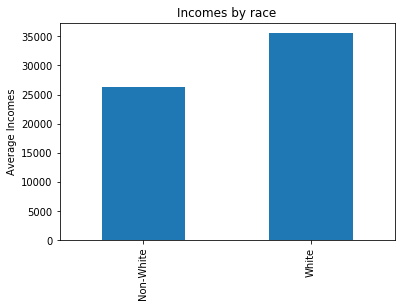

In [ ]:
f = plt.figure()

plt.title('Incomes by race', color='black')
b=grouping02.plot(kind='bar',  legend=False,ax=f.gca())
b.set_ylabel("Average Incomes")
b.set_xlabel("")
positions = (0,1)
labels = ("Non-White", "White")
plt.xticks(positions, labels)

plt.show()

There is in-fact a difference

## Show differences in average incomes between whites and non-whites by education <br>

In [ ]:
groupingA=AllState_df[AllState_df['income']>0]['income'].groupby([AllState_df['white'],AllState_df['educationlevel']])

In [ ]:
groupingA2=groupingA.mean()
groupingA2=groupingA2.unstack()
groupingA2=groupingA2.transpose()
groupingA2=groupingA2.loc[['Less_Than_HS', 'HS_Grad', 'Some_College', 'College_Grad', 'More_College'], :]

In [ ]:
groupingA2

white,False,True
educationlevel,,
Less_Than_HS,16935.597650,17130.014103
HS_Grad,21502.248930,26082.455691
Some_College,25867.679872,31390.483877
College_Grad,41165.127956,52151.960800
More_College,58680.092902,69034.863220


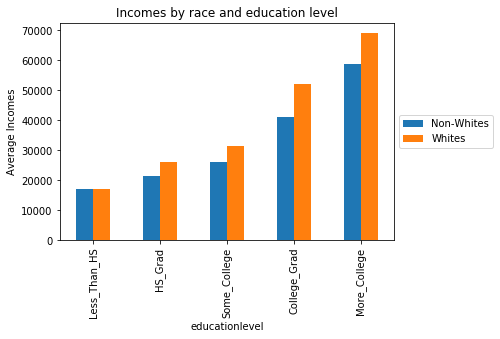

In [ ]:
f = plt.figure()

plt.title('Incomes by race and education level', color='black')
b=groupingA2.plot(kind='bar',ax=f.gca())
b.set_ylabel("Average Incomes")
b.legend(["Non-Whites", "Whites"],loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

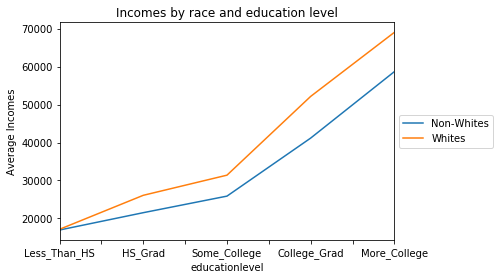

In [ ]:
f = plt.figure()

plt.title('Incomes by race and education level', color='black')
b=groupingA2.plot(kind='line', ax=f.gca())
b.set_ylabel("Average Incomes")
b.legend(["Non-Whites", "Whites"],loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
groupingA2['IncomeDifference']=groupingA2[True]-groupingA2[False]

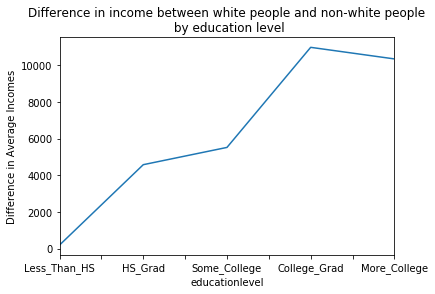

In [ ]:
f = plt.figure()

plt.title('Difference in income between white people and non-white people\n by education level', color='black')
b=groupingA2.plot(y='IncomeDifference',kind='line', legend=False, ax=f.gca())
b.set_ylabel("Difference in Average Incomes")
plt.show()

## Look at the differences in average incomes between races by education for different states individually <br>

In [ ]:
groupingB=AllState_df[AllState_df['income']>0]['income'].groupby([AllState_df['white'],AllState_df['educationlevel'],AllState_df['state']])

In [ ]:
groupingB2=groupingB.mean()
groupingB2=groupingB2.unstack()
groupingB2=groupingB2.unstack()
groupingB2=groupingB2.transpose()
groupingB2['IncomeDifference']=groupingB2[True]-groupingB2[False]
groupingB2=groupingB2.drop(columns=[False, True])
groupingB2=groupingB2.unstack()
groupingB2=groupingB2.transpose()
groupingB2 = groupingB2.reset_index()
groupingB2 = groupingB2.drop(columns=['white'])
groupingB2 = groupingB2.set_index('educationlevel')
groupingB2=groupingB2.loc[['Less_Than_HS', 'HS_Grad', 'Some_College', 'College_Grad', 'More_College'], :]
groupingB2

state,California,Georgia,Hawaii,New_York,North_Dakota,Texas,Wisconsin
educationlevel,,,,,,,
Less_Than_HS,1548.327955,2006.800413,1228.607645,-751.703091,-930.840162,-96.960109,-1563.902908
HS_Grad,5339.255371,5238.366823,1732.101529,3824.473060,8549.160181,5238.495203,4336.618649
Some_College,7746.698880,6267.319775,2214.442233,4782.680895,2644.213959,5612.218624,4376.911580
College_Grad,12528.044233,15300.808724,4317.560770,12741.839244,1868.557615,12440.138631,3966.622615
More_College,12395.594859,12768.683100,1082.953280,9049.421039,-3486.062640,14735.504937,4301.259939


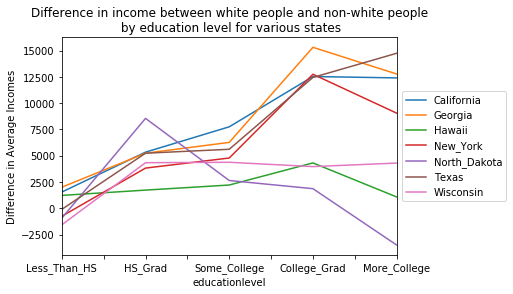

In [ ]:
f = plt.figure()

plt.title('Difference in income between white people and non-white people\n by education level for various states', color='black')
b=groupingB2.plot(kind='line', ax=f.gca())
b.set_ylabel("Difference in Average Incomes")
b.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

JMG This is really well done.  The idea of drawing difference plots is a good one.  The allstates DF is a nice way of getting to the groupings you want.